In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
#from sklearn.metrics import mean_squared_error
#from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
#%matplotlib inline+

url_B = "https://data.brasil.io/dataset/covid19/caso.csv.gz"

In [2]:
df = pd.read_csv(url_B, sep = ",")

In [3]:
df_hoje = df.loc[df['is_last'] == True, :]

In [4]:
FMT = '%Y-%m-%d'

date = df['date']

df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-25", FMT)).days)

In [5]:
df_hoje_estados = df_hoje.loc[df_hoje['city'].isnull(), :].drop(['city', 'place_type', 'is_last', 'city_ibge_code', 'order_for_place'], axis = 1)
df_hoje_estados.reset_index(drop = True, inplace = True)
df_hoje_estados.columns = ['date', 'state', 'confirmed', 'deaths', 'population', 'confirmed_incidence', 'death_rate']
df_hoje_estados['confirmed_incidence'] = round(df_hoje_estados['confirmed_incidence'] * 10, 2)
df_hoje_estados['death_rate'] *= 100

In [6]:
df_estados = df.loc[df['city'].isnull(), :].drop(['city', 'place_type', 'city_ibge_code', 'order_for_place'], axis = 1)
df_estados.reset_index(drop = True, inplace = True)


df_Brasil = df_estados.drop(['is_last', 'estimated_population_2019', 'confirmed_per_100k_inhabitants', 'death_rate'], axis = 1)
df_Brasil = df_Brasil.groupby('date').sum()

In [8]:
df_estados
estados = list(df_estados.sort_values("confirmed", ascending = False)['state'].unique())

In [9]:
df_UF = []
df_UF = estados
estados = list(df_estados.sort_values("confirmed", ascending = False)['state'].unique())

for e in range(27) :
    df_UF[e] = df_estados.loc[df_estados['state'] == estados[e], :].drop(['estimated_population_2019', 'is_last'], axis = 1)
    df_UF[e] = df_UF[e].sort_values('date', ascending = True)
    df_UF[e].reset_index(drop = True, inplace = True)
    
estados = list(df_estados.sort_values("confirmed", ascending = False)['state'].unique())

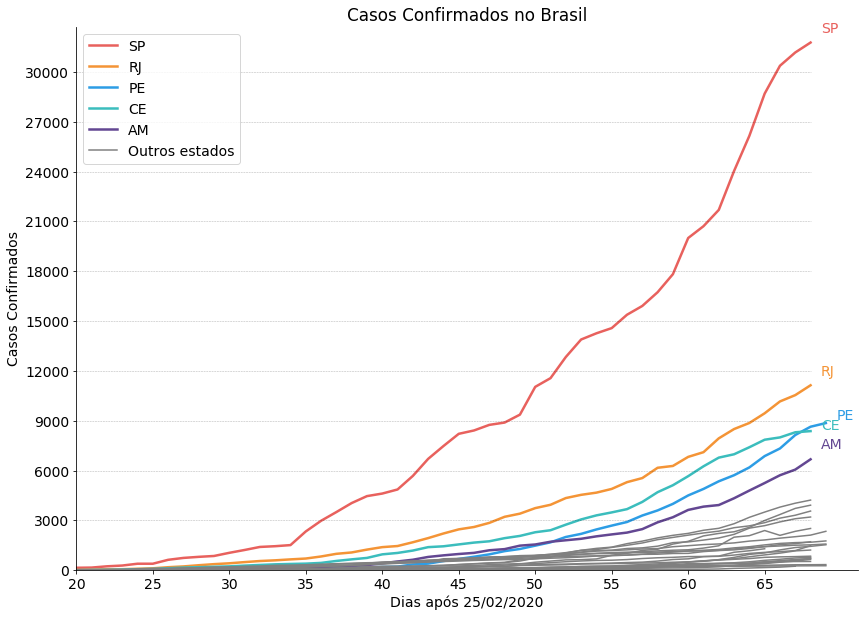

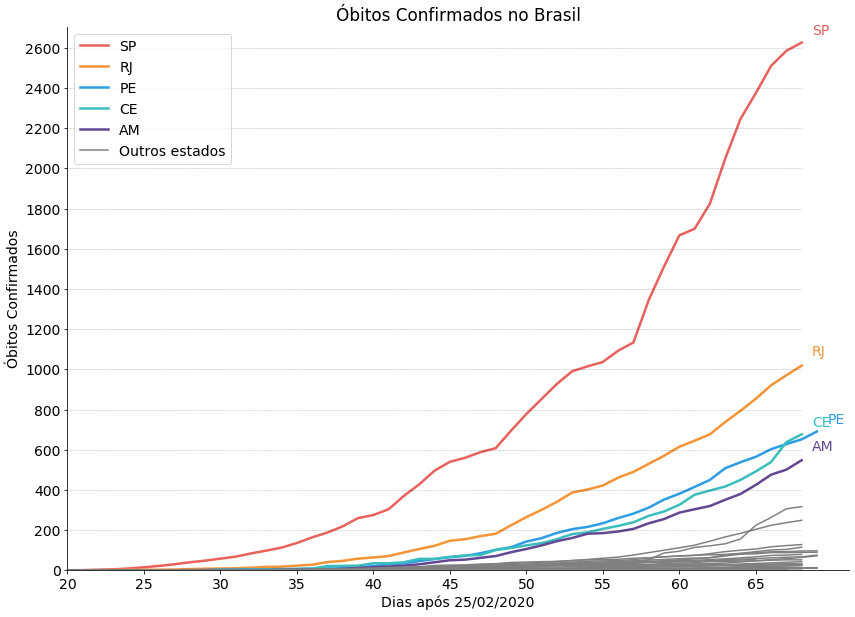

In [29]:
label = ["Dia", "Estado", "Casos Confirmados", "Óbitos Confirmados", "Incidência de Casos", "Mortalidade"]
color = ['#e8615d', '#f49436', '#2d9de5', '#3bbdbd', '#634792']

for f in range(2, 4) :
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]
    plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
                    labelbottom = "on", left = "off", right = "off", labelleft = "on")
    
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    
    # Brasil data
#     x = range(max(df_Brasil.index))
#     y = list(df_Brasil.iloc[x, f - 2])
#     plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
#     plt.text(max(x) * 1.01, (2 * y[-1] - y[-2]), "Brasil", color = "black", fontsize = 14)
    
    x_max = max(x)
    y_max = max(y)
    for e in range(27) :

        # Real data
        x = list(df_UF[e].iloc[:, 0])
        y = list(df_UF[e].iloc[:, f])
        
        if max(x) > x_max :
            x_max = max(x)
        if max(y) > y_max :
            y_max = max(y)
  
        if e < 5 :
            plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
            plt.text(max(x) * 1.01, (2 * y[-1] - y[-2]), estados[e], color = color[e], fontsize = 14)
        elif e == 5 :
            plt.plot(x, y, marker = ' ', label = 'Outros estados', color = 'gray', lw = 1.5)
        else :
            plt.plot(x, y, marker = ' ', color = 'gray', lw = 1.5)
            
    ytick = 1000 * int(0.0001 * y_max)
    if ytick == 0 : 
        ytick = 100 * int(0.001 * y_max)
   
    plt.yticks(range(0, y_max, ytick), fontsize=14)    
    plt.xticks(range(0, x_max, 5), fontsize = 14)
    
    for t in range(0, y_max, ytick) :    
         plt.plot(range(20, x_max), [t] * len(range(20, x_max)), linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

    plt.xlim(20, x_max * 1.03)
    plt.ylim(0, y_max * 1.03)
    plt.title(label[f] + " no Brasil")
    plt.legend(loc = 2)
    #plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig(label[f] + " COVID19 Brasil.png")
    plt.show()

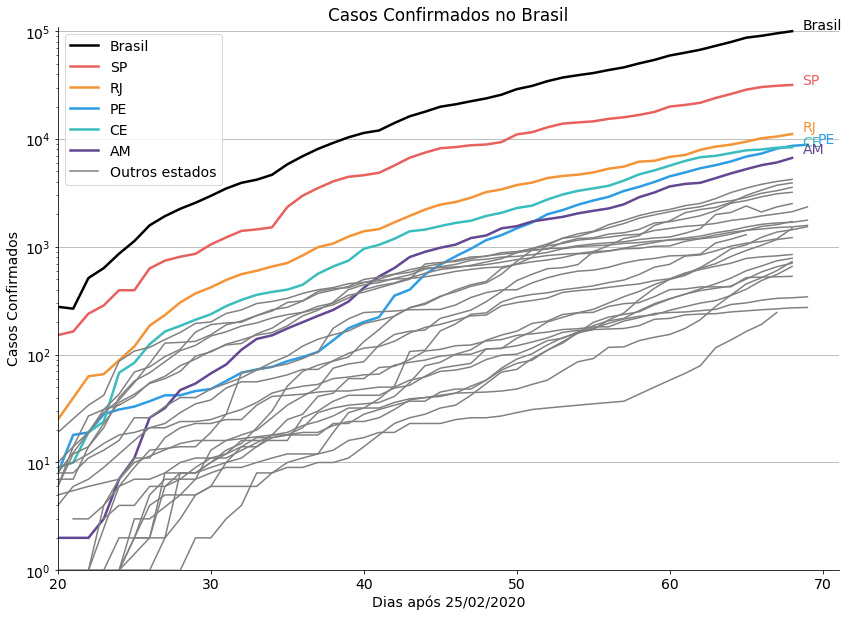

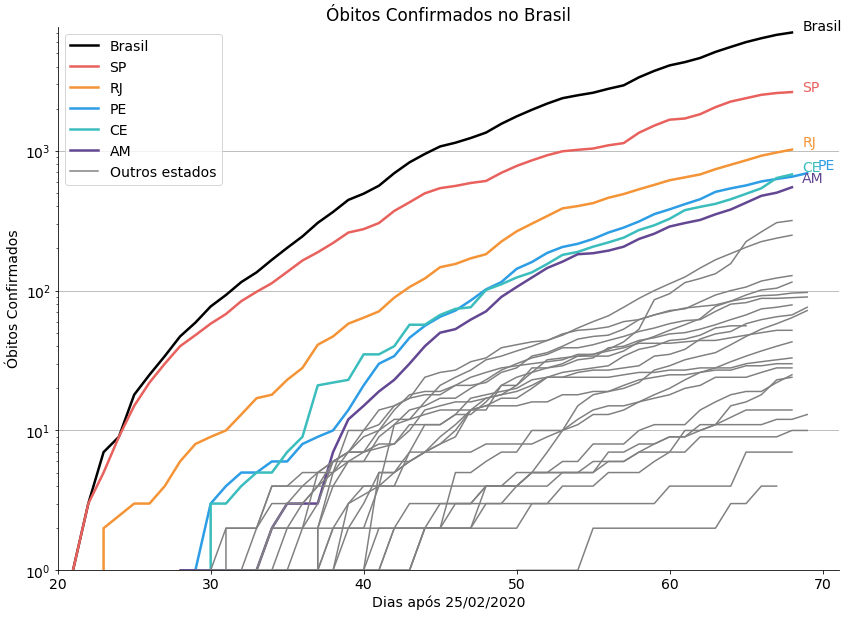

In [31]:
label = ["Dia", "Estado", "Casos Confirmados", "Óbitos Confirmados", "Incidência de Casos", "Mortalidade"]
color = ['#e8615d', '#f49436', '#2d9de5', '#3bbdbd', '#634792']

for f in range(2, 4) :
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]
    #plt.tick_params(axis = "both", which = "both", bottom = "off", top = "off",    
    #                labelbottom = "on", left = "off", right = "off", labelleft = "on")
    
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y')
    # Brasil data
    x = range(max(df_Brasil.index))
    y = list(df_Brasil.iloc[x, f - 2])
    plt.plot(x, y, marker = ' ', color = 'black', label = "Brasil", lw = 2.5) 
    plt.text(max(x) * 1.01, (2 * y[-1] - y[-2]), "Brasil", color = "black", fontsize = 14)
    
    x_max = max(x)
    y_max = max(y)
    for e in range(27) :

        # Real data
        x = list(df_UF[e].iloc[:, 0])
        y = list(df_UF[e].iloc[:, f])
        
        if max(x) > x_max :
            x_max = max(x)
        if max(y) > y_max :
            y_max = max(y)
  
        if e < 5 :
            plt.plot(x, y, marker = ' ', label = estados[e], color = color[e], lw = 2.5)
            plt.text(max(x) * 1.01, (2 * y[-1] - y[-2]), estados[e], color = color[e], fontsize = 14)
        elif e == 5 :
            plt.plot(x, y, marker = ' ', label = 'Outros estados', color = 'gray', lw = 1.5)
        else :
            plt.plot(x, y, marker = ' ', color = 'gray', lw = 1.5)

    plt.xlim(20, x_max * 1.03)
    plt.ylim(1, y_max * 1.1)
    plt.title(label[f] + " no Brasil")
    plt.legend(loc = 2)
    plt.yscale('log')
    plt.xlabel("Dias após 25/02/2020")
    plt.ylabel(label[f])
    plt.savefig(label[f] + " COVID19 Brasil log.png")
    plt.show()


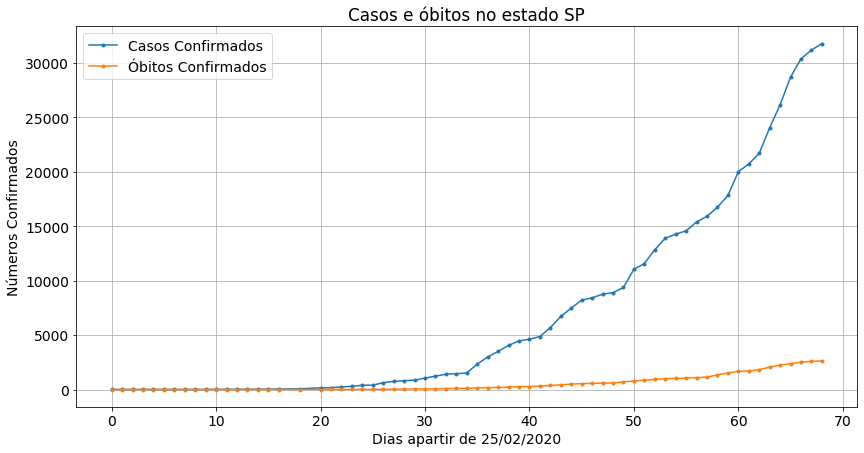

0


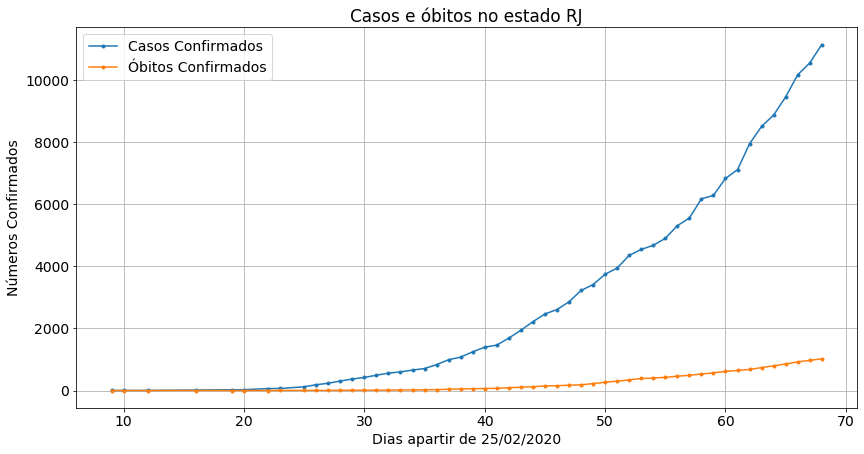

9


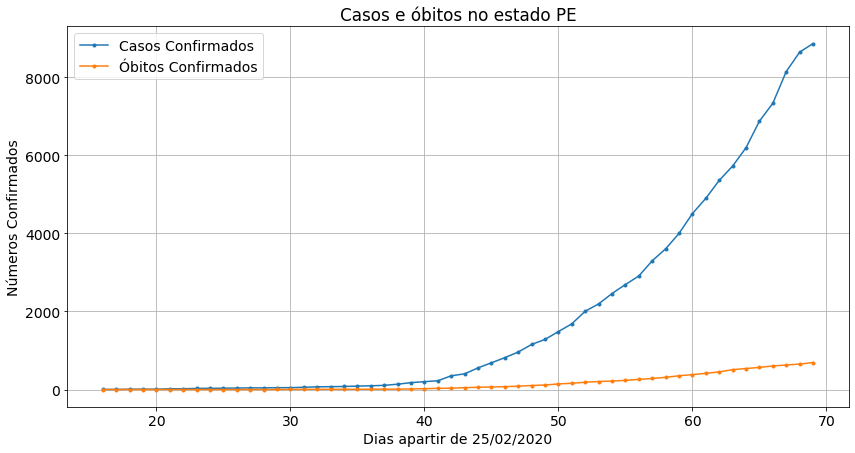

16


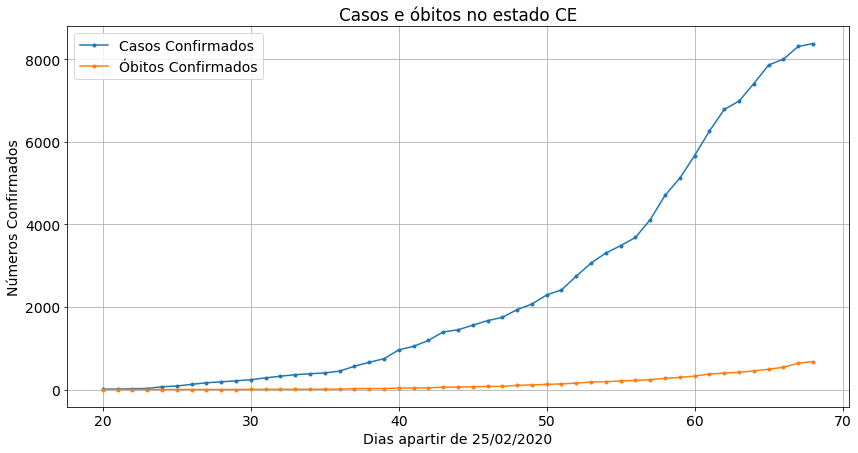

20


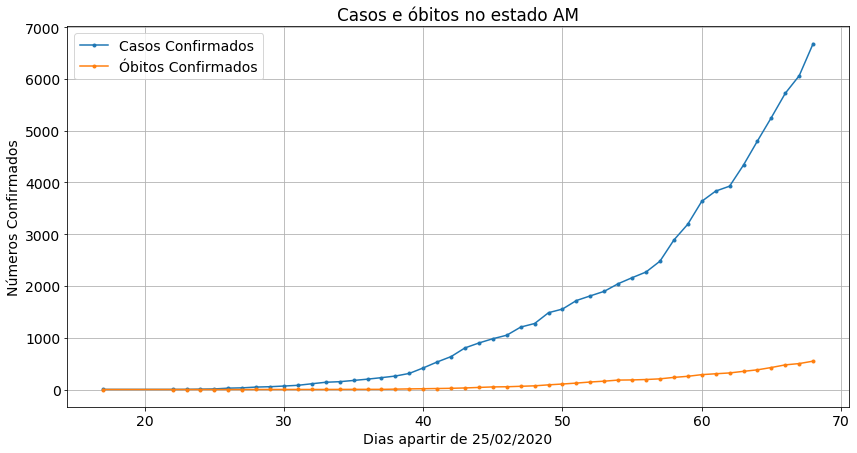

17


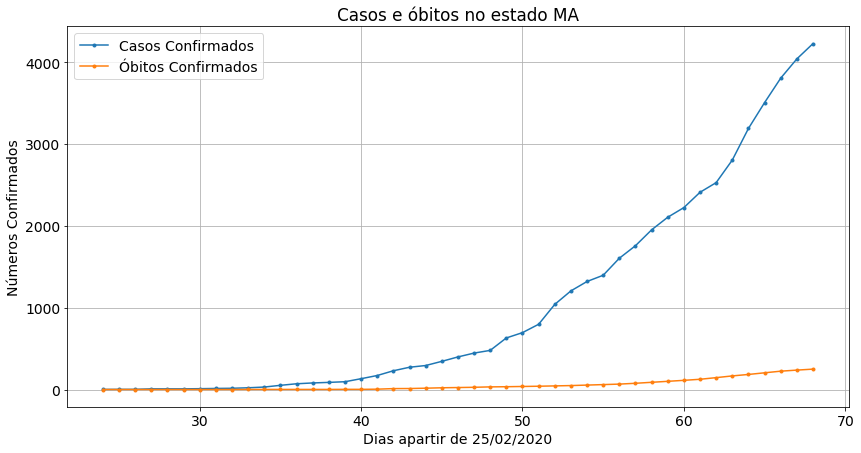

24


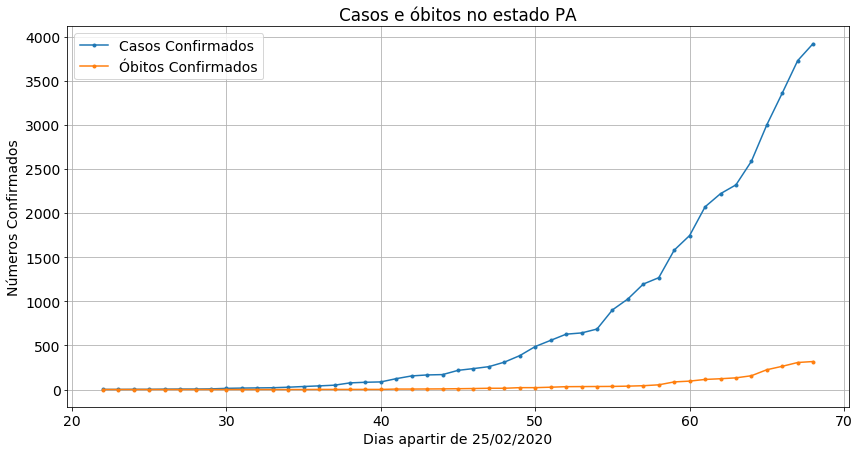

22


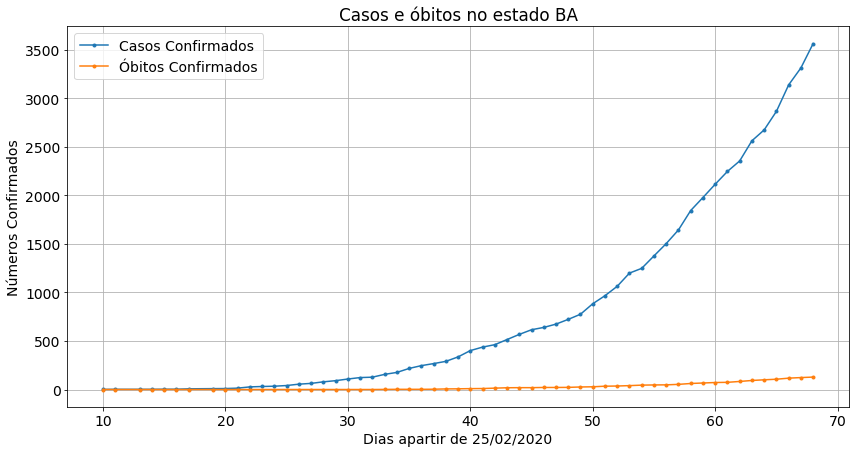

10


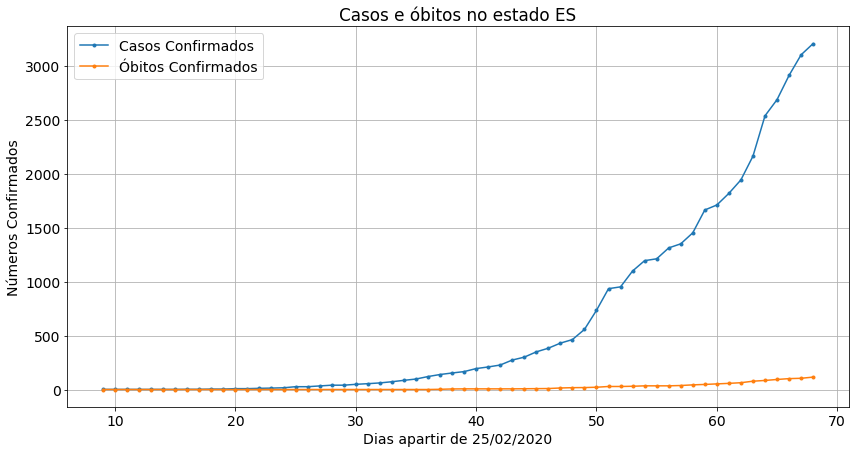

9


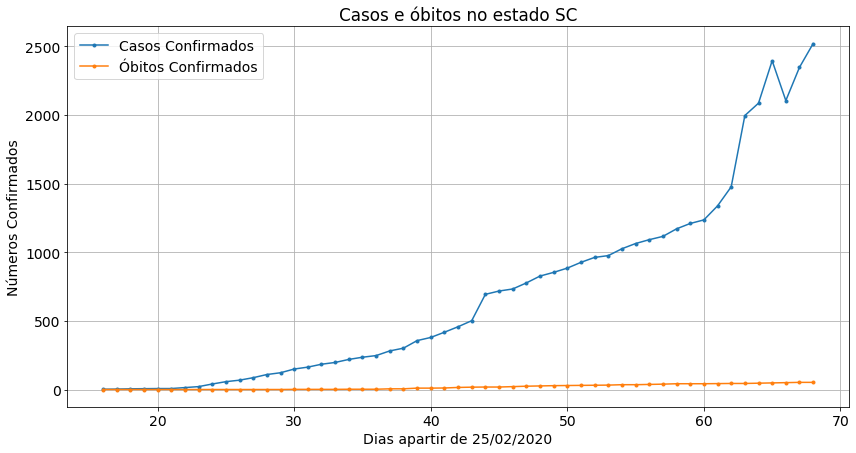

16


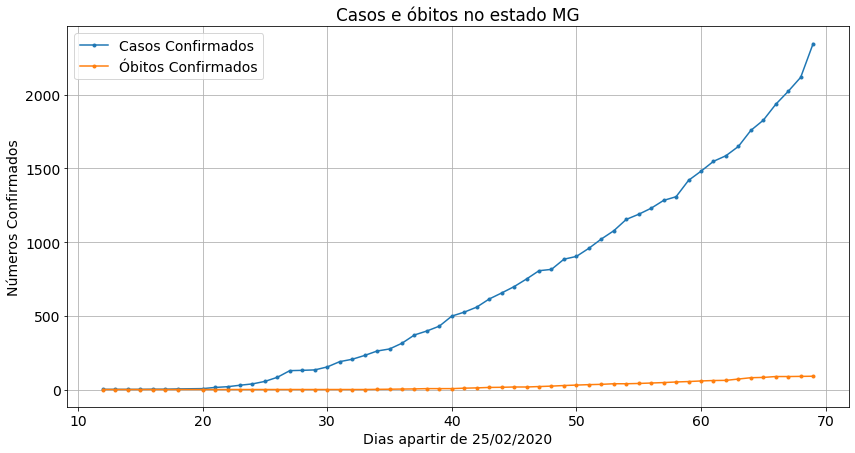

12


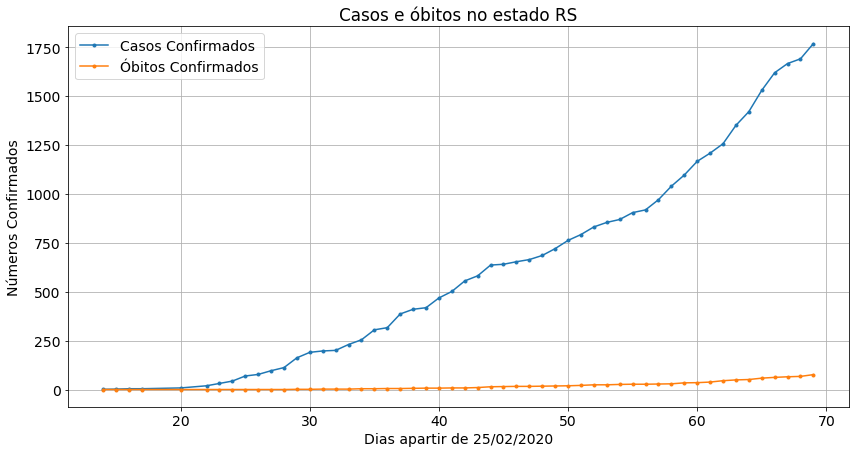

14


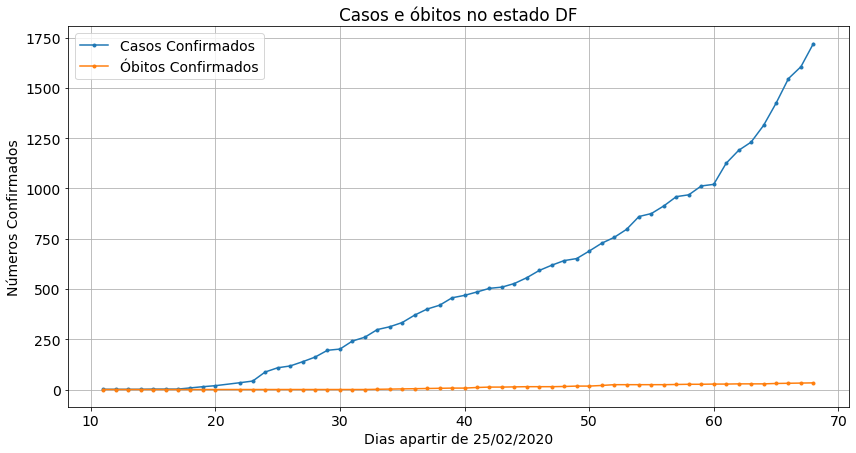

11


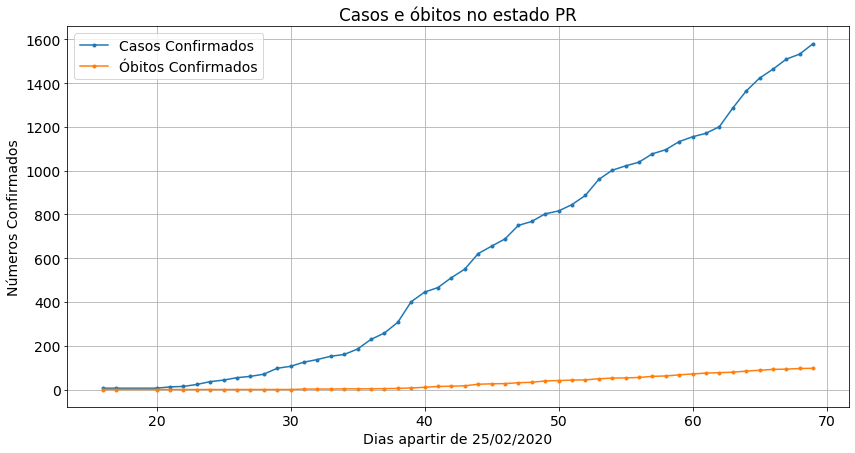

16


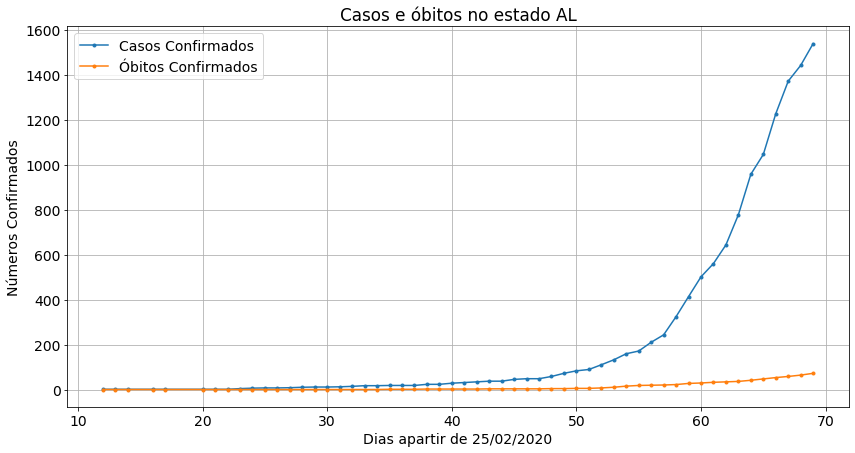

12


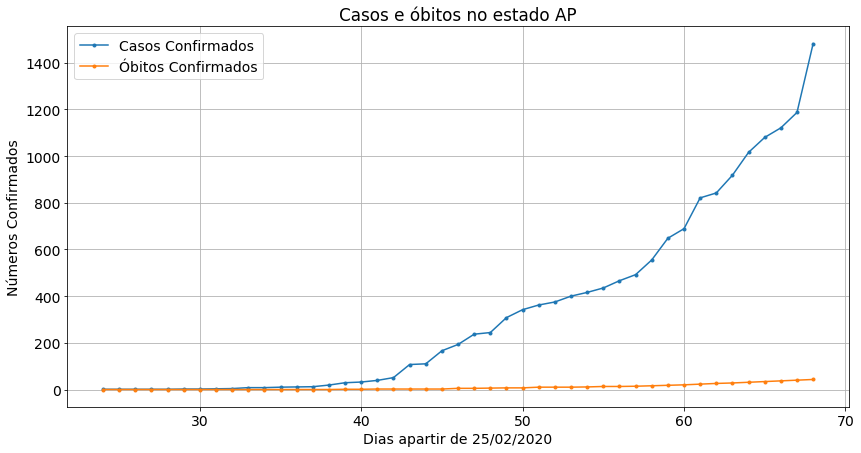

24


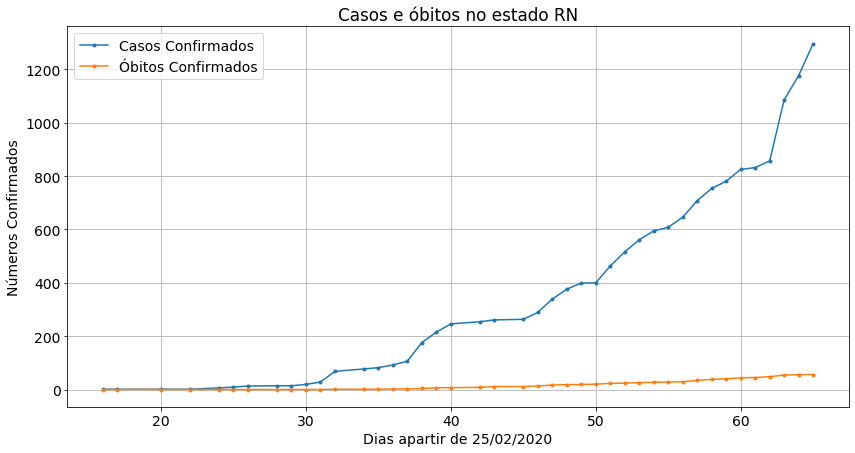

16


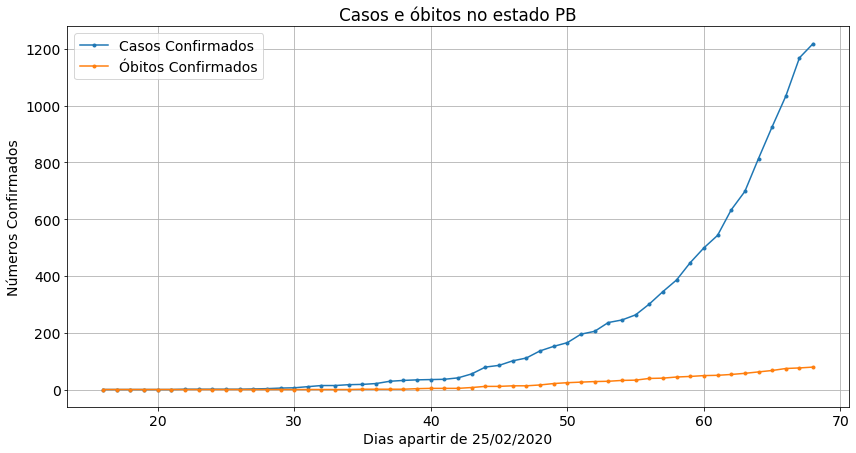

16


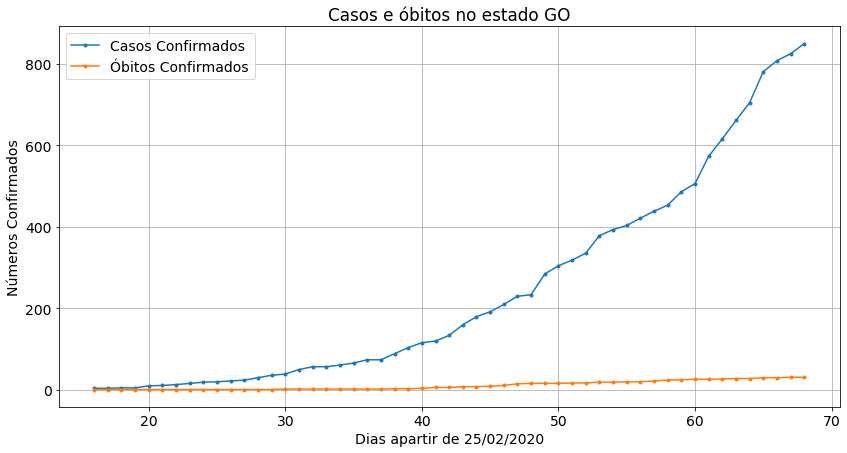

16


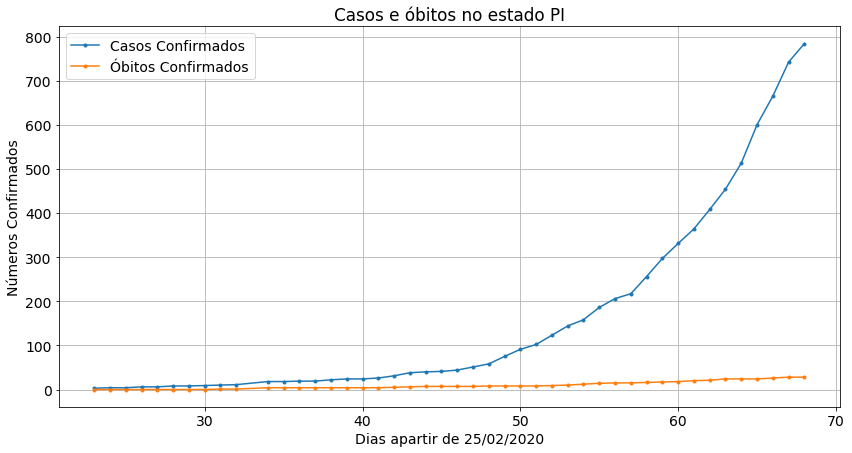

23


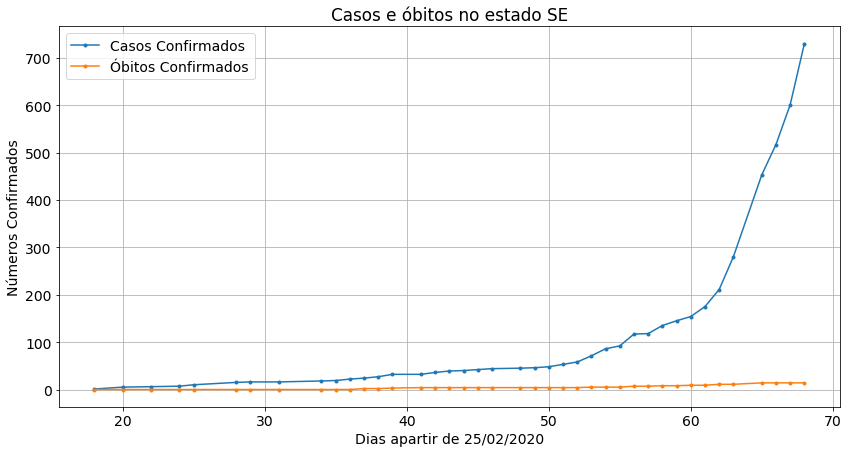

18


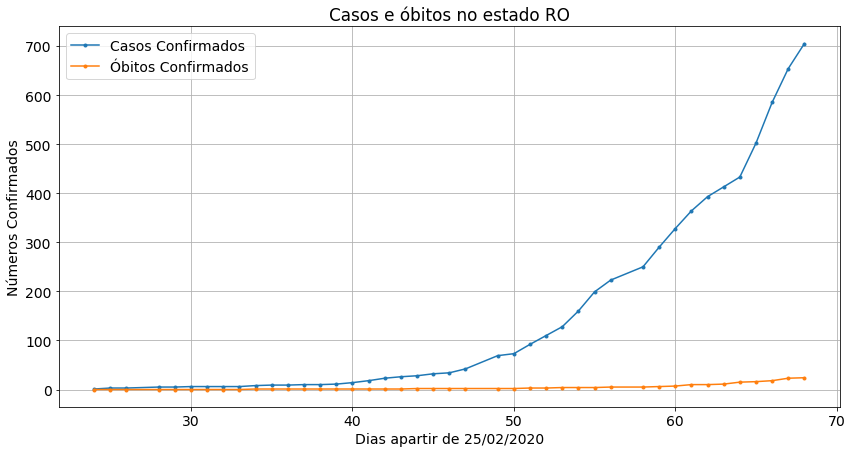

24


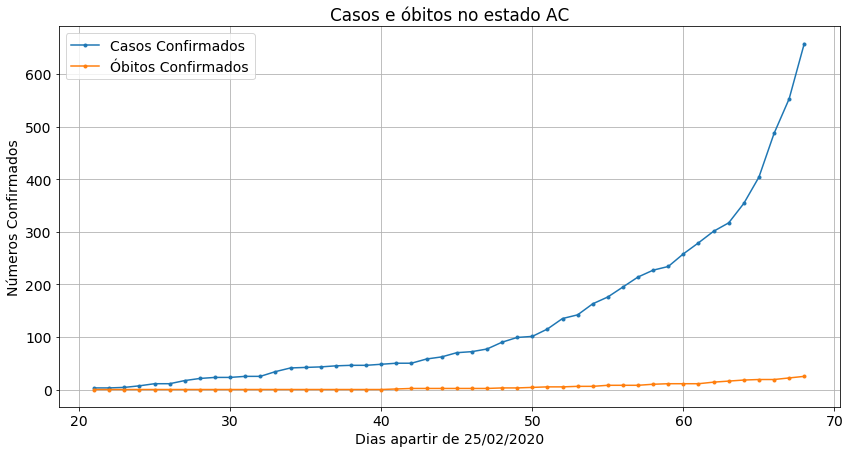

21


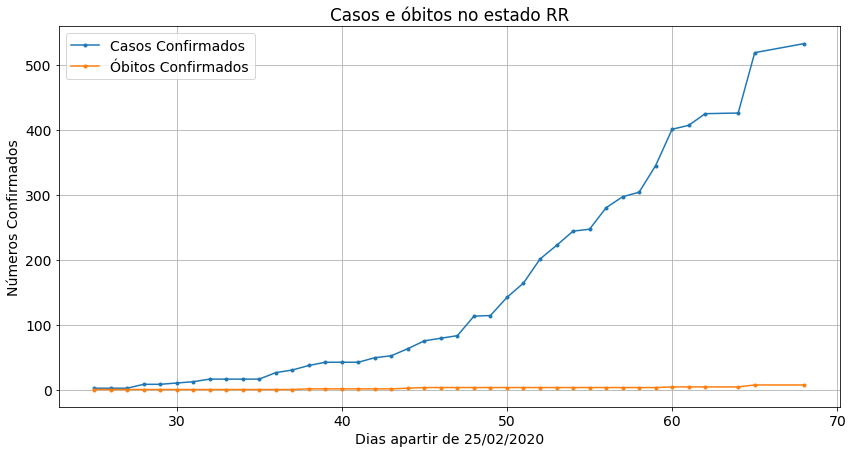

25


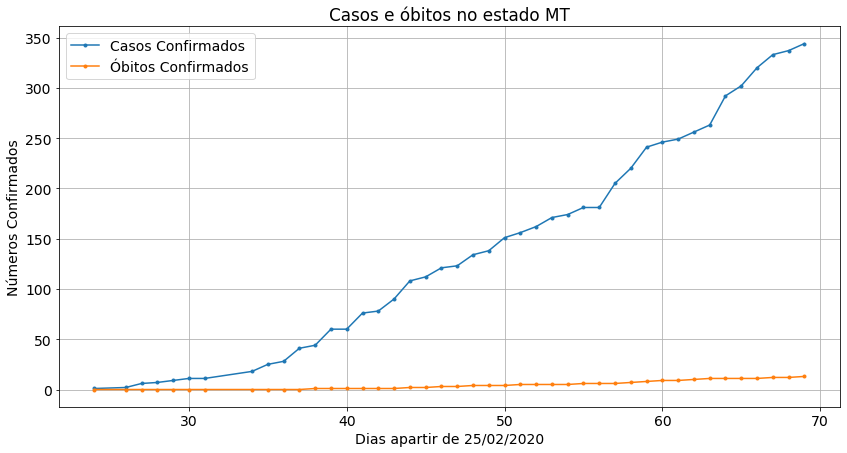

24


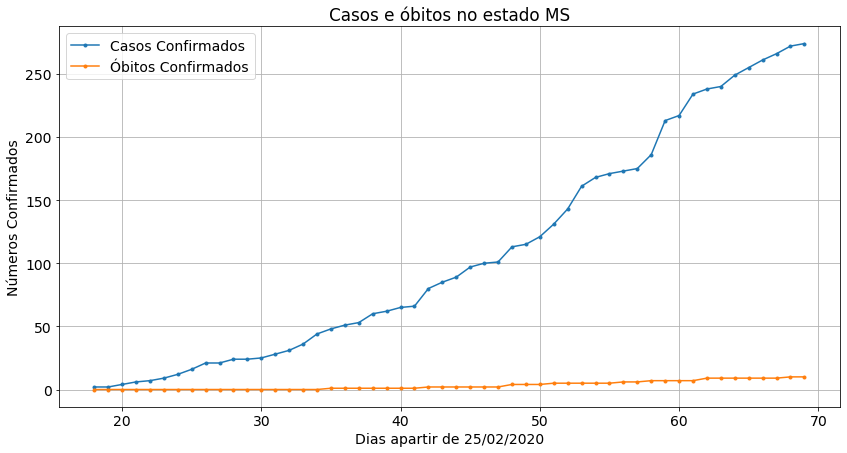

18


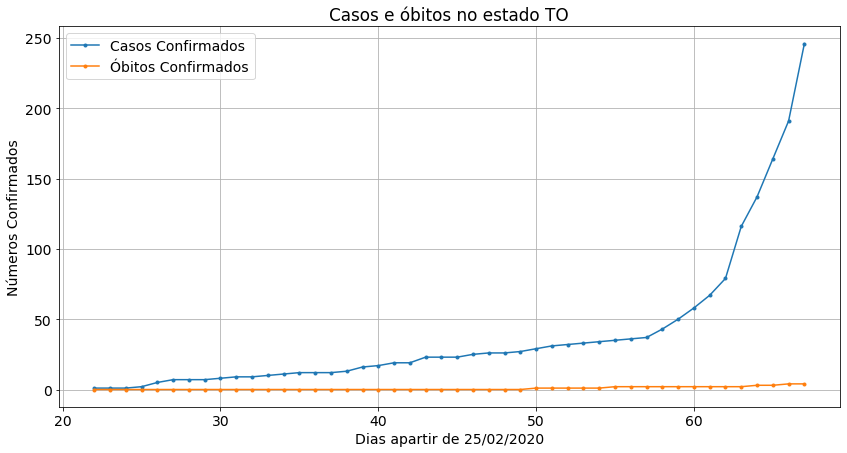

22


In [11]:
label = ["Dia", "Estado", "Casos Confirmados", "Óbitos Confirmados", "Incidência de Casos", "Mortalidade"]

plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [14, 7]

for e in range(27) :

    plt.grid(True)

    # Real data
    
    x = list(df_UF[e].iloc[:, 0])
    for f in range(2, 4) :
        y = list(df_UF[e].iloc[:, f])

        plt.plot(x, y, marker = '.', label = label[f])

    plt.title("Casos e óbitos no estado " + estados[e])
    plt.legend()
    #plt.yscale('log')
    plt.xlabel("Dias apartir de 25/02/2020")
    plt.ylabel("Números Confirmados")
    plt.show()
    print(min(x))

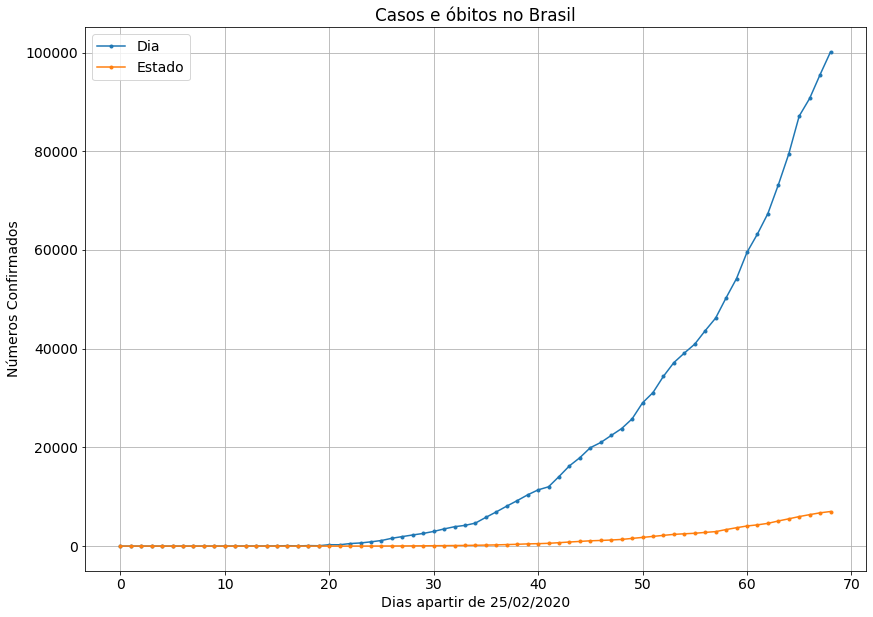

In [16]:
plt.grid(True)
plt.rc('font', size=14)
plt.rcParams['figure.figsize'] = [14, 7]

x = range(max(df_Brasil.index))
for f in range(2) :
    y = list(df_Brasil.iloc[x, f])

    plt.plot(x, y, marker = '.', label = label[f])
plt.title("Casos e óbitos no Brasil")
plt.legend()
#plt.yscale('log')
plt.xlabel("Dias apartir de 25/02/2020")
plt.ylabel("Números Confirmados")
plt.show()